<a href="https://colab.research.google.com/github/Harini0324/VIS-ARBOUR/blob/main/SIH1_Tree_Detection_Segmentation_Numeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Image

In [ ]:
pip install pillow

In [ ]:
import PIL.Image

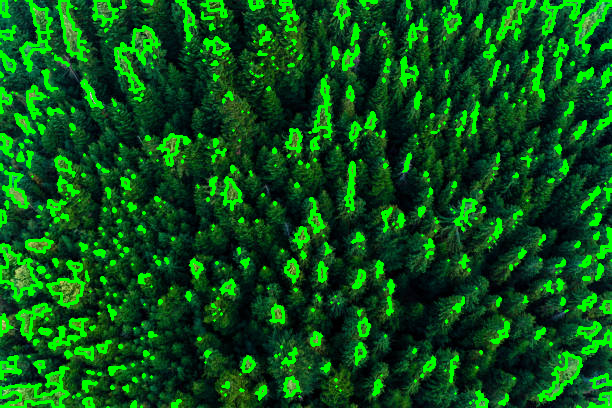

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "tree12.jpg"
image = cv2.imread(image_path)

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

L, a, b = cv2.split(lab_image)

threshold = 128
tree_mask = (L > threshold).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
tree_mask = cv2.morphologyEx(tree_mask, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(tree_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_image = image.copy()
cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


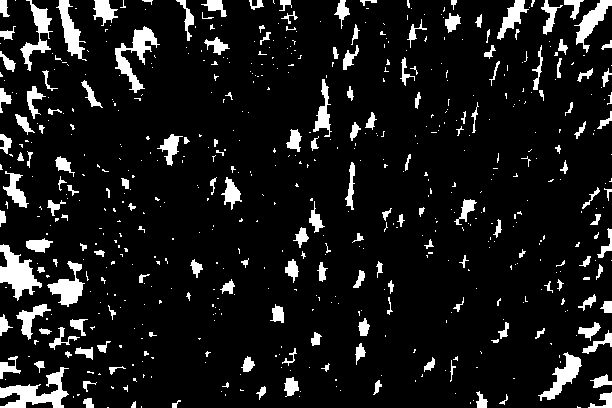

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "tree12.jpg"
image = cv2.imread(image_path)

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

L, a, b = cv2.split(lab_image)

threshold = 128
tree_mask = (L > threshold).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
tree_mask = cv2.morphologyEx(tree_mask, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(tree_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#black image with the same size as the original image
marked_image = np.zeros_like(image)

cv2.drawContours(marked_image, contours, -1, (255, 255, 255), -1)

cv2_imshow(marked_image)

cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def segment_and_count_trees(image_path):

  #convert it to Lab color space
  image = cv2.imread(image_path)
  lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

  # Extract the L channel
  L, a, b = cv2.split(lab_image)

  # Threshold the L channel to generate a binary mask
  threshold = 128
  tree_mask = (L > threshold).astype(np.uint8)

  #morphological operations to close the gaps
  kernel = np.ones((5, 5), np.uint8)
  tree_mask = cv2.morphologyEx(tree_mask, cv2.MORPH_CLOSE, kernel)

  # Find the contours of the trees in the mask
  contours, _ = cv2.findContours(tree_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Segment the trees using the Watershed algorithm
  segmented_trees = []
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped_image = image[y:y + h, x:x + w]

    tree_crown_mask = np.zeros((h, w), np.uint8)
    cv2.drawContours(tree_crown_mask, [contour], -1, (255, 255, 255), -1)

    # Convert the tree crown mask to a 32-bit single-channel image
    tree_crown_mask = tree_crown_mask.astype(np.int32)

    # Watershed algorithm
    segmented_tree = cv2.watershed(cropped_image, tree_crown_mask)

    segmented_trees.append(segmented_tree)

  tree_count = len(segmented_trees)

  return tree_count

image_path = "tree12.jpg"
tree_count = segment_and_count_trees(image_path)

print("The total number of trees in the image is:", tree_count)


The total number of trees in the image is: 610


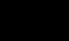

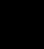

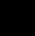

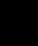

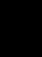

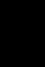

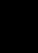

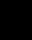

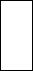

The total number of trees in the image is: 610


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def segment_and_count_trees(image_path):

  image = cv2.imread(image_path)
  lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

  L, a, b = cv2.split(lab_image)

  threshold = 128
  tree_mask = (L > threshold).astype(np.uint8)

  kernel = np.ones((5, 5), np.uint8)
  tree_mask = cv2.morphologyEx(tree_mask, cv2.MORPH_CLOSE, kernel)

  contours, _ = cv2.findContours(tree_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  segmented_trees = []
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped_image = image[y:y + h, x:x + w]

    tree_crown_mask = np.zeros((h, w), np.uint8)
    cv2.drawContours(tree_crown_mask, [contour], -1, (255, 255, 255), -1)

    tree_crown_mask = tree_crown_mask.astype(np.int32)

    segmented_tree = cv2.watershed(cropped_image, tree_crown_mask)

    segmented_trees.append(segmented_tree)

  tree_count = len(segmented_trees)

  return tree_count, segmented_trees


image_path = "tree12.jpg"
tree_count, segmented_trees = segment_and_count_trees(image_path)

for segmented_tree in segmented_trees:
    cv2_imshow(segmented_tree)

print("The total number of trees in the image is:", tree_count)